In [8]:
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
PREDICTLOG = "../logs/predict-Mayo-HR,SpO2,InvBPSys,InvBPDias,RRtotal-5,15,30:1-rnn-128-3-0.5.log"

In [13]:
nlls = {5: [], 15: [], 30: []}
stds = {5: [], 15: [], 30: []}
with open(PREDICTLOG) as f:
    for line in f:
        words = line.split()
        try:
            depth = int(words[0])
            std = float(words[5])
            nll = float(words[8])
            if str(std) != 'nan':
                stds[depth].append(std)
            if str(nll) != 'nan':
                nlls[depth].append(nll)
        except Exception as e:
            print(e)

could not convert string to float: 'avg'
could not convert string to float: 'data/monitor-dataset-Mayo_MICU_O4O894A_20380522.pkl'
could not convert string to float: 'std:'


## Negative log-likelihood

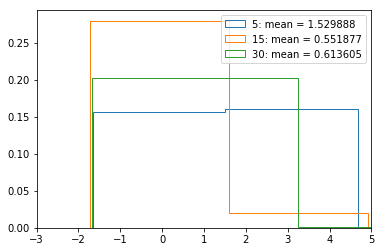

In [14]:
for k in sorted(nlls.keys()):
    plt.hist(nlls[k], fill=False, histtype='step', normed=True,
             label=format("{}: mean = {:4f}".format(k, sum(nlls[k])/len(nlls[k]))))
    plt.xlim((-3,5))
plt.legend()

## Standard deviation

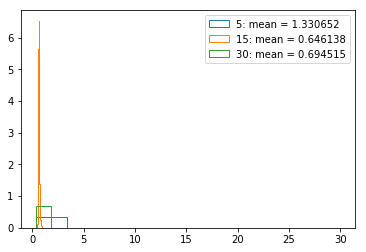

In [15]:
for k in sorted(stds.keys()):
    plt.hist(stds[k], histtype='step', normed=True,
             label=format("{}: mean = {:4f}".format(k, sum(stds[k])/len(stds[k]))))
plt.legend()